## Number Recognition

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load themnist pre-shuffled train data and test data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape, "x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [3]:
np.random.seed(0)

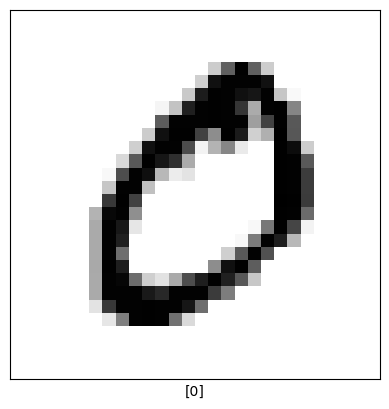

In [4]:
# Show one of the images from the training dataset

plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[1]])
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), strides=(1, 1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [9]:
x_train = x_train.reshape(-1,28, 28,1)#Reshape for CNN 
x_test = x_test.reshape(-1,28, 28, 1)

In [10]:
model_log = model.fit(x_train, y_train,
                      batch_size=60,
                      epochs=10,
                      verbose=1,
                      validation_split=.3)

Epoch 1/10
700/700 [==============================] - 54s 74ms/step - loss: 0.3826 - accuracy: 0.8765 - val_loss: 0.1110 - val_accuracy: 0.9671
Epoch 2/10
700/700 [==============================] - 52s 75ms/step - loss: 0.1393 - accuracy: 0.9564 - val_loss: 0.0708 - val_accuracy: 0.9793
Epoch 3/10
700/700 [==============================] - 50s 72ms/step - loss: 0.1067 - accuracy: 0.9662 - val_loss: 0.0651 - val_accuracy: 0.9803
Epoch 4/10
700/700 [==============================] - 56s 80ms/step - loss: 0.0888 - accuracy: 0.9701 - val_loss: 0.0505 - val_accuracy: 0.9843
Epoch 5/10
700/700 [==============================] - 51s 73ms/step - loss: 0.0759 - accuracy: 0.9753 - val_loss: 0.0445 - val_accuracy: 0.9869
Epoch 6/10
700/700 [==============================] - 52s 74ms/step - loss: 0.0669 - accuracy: 0.9786 - val_loss: 0.0447 - val_accuracy: 0.9862
Epoch 7/10
700/700 [==============================] - 52s 74ms/step - loss: 0.0642 - accuracy: 0.9792 - val_loss: 0.0436 - val_accuracy:

In [11]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9902999997138977


In [12]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 4s 11ms/step


array([7.5591707e-08, 1.4444413e-08, 3.0679366e-06, 2.9047182e-05,
       1.1964348e-10, 6.6066832e-08, 8.3854630e-13, 9.9995935e-01,
       1.8126470e-07, 8.1638227e-06], dtype=float32)

In [13]:
np.argmax(predictions[0])

7

In [14]:
x_test = x_test.reshape(-1,28, 28)
x_test.shape

(10000, 28, 28)

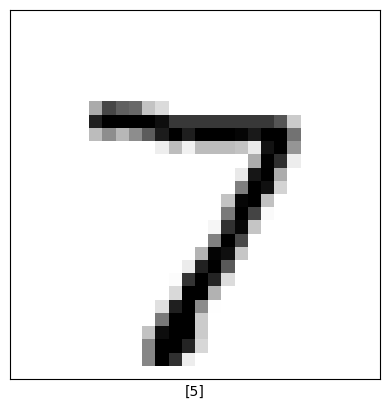

In [15]:
# Show one of the images from the test dataset

plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[0]])
plt.imshow(x_test[0], cmap=plt.cm.binary)

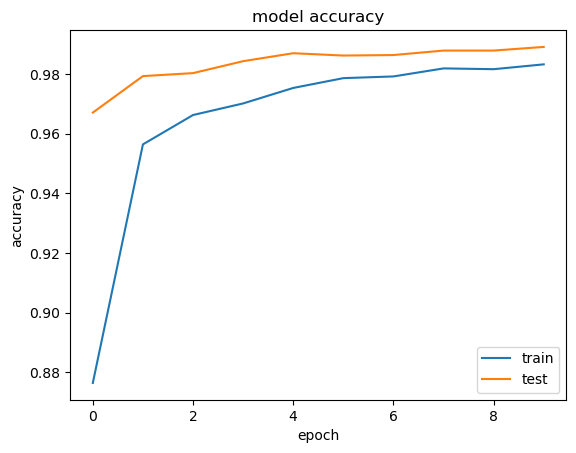

In [16]:
import os

# plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

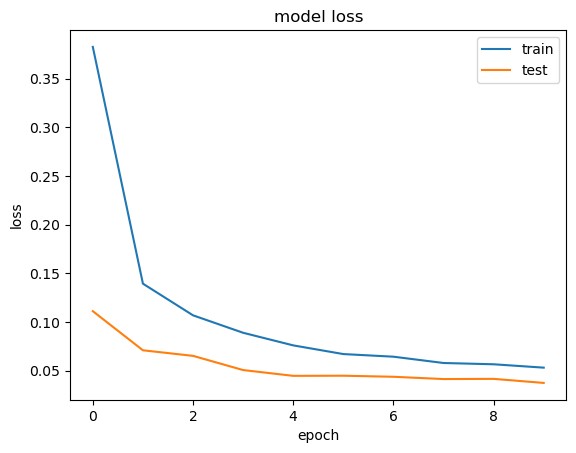

In [17]:
# plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

In [18]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                         100*np.max(predictions_array),
                                         [true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

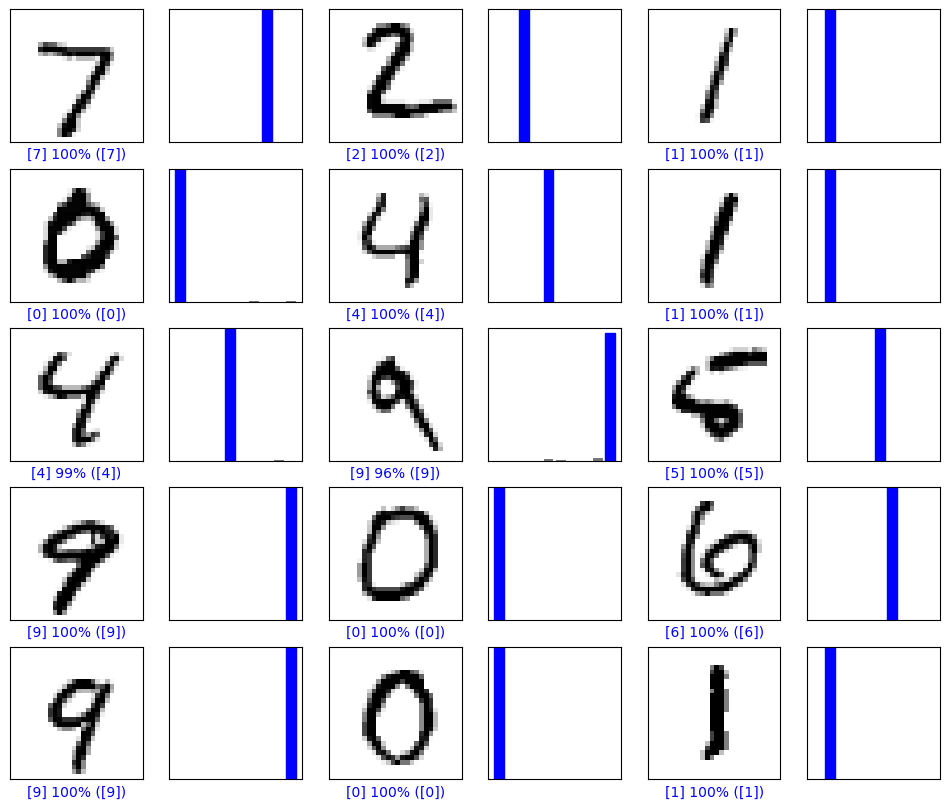

In [19]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

num_rows = 5
num_cols = 3

num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)

plt.show()